In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from metric.dataset import LmdbDataset
from torchvision.transforms import Resize

In [2]:
data = np.load('embedding.npz')
attns = data['attns']

In [3]:
imgs = []
lmdb = LmdbDataset('/home/data/kaggle/google_landmark_2021/lmdb/val')
for i in range(100):
    imgs.append(lmdb[i][0])

In [4]:
def display(img, attn):
   f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
   attn = torch.as_tensor(attn)
   attn = attn.abs()
   attn = attn.mean(dim=0)
   attn = torch.unsqueeze(attn, dim=0)
   attn = Resize((img.size[1], img.size[0]))(attn).numpy()
   attn = np.squeeze(attn)
   ax[0].imshow(img)
   ax[1].imshow(img)
   ax[1].imshow(attn, alpha=0.5, cmap='hot')
   ax[0].axis('off')
   ax[1].axis('off')
   f.tight_layout()
   return f

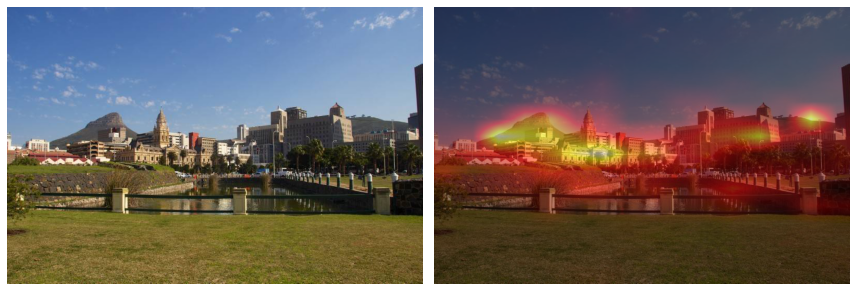

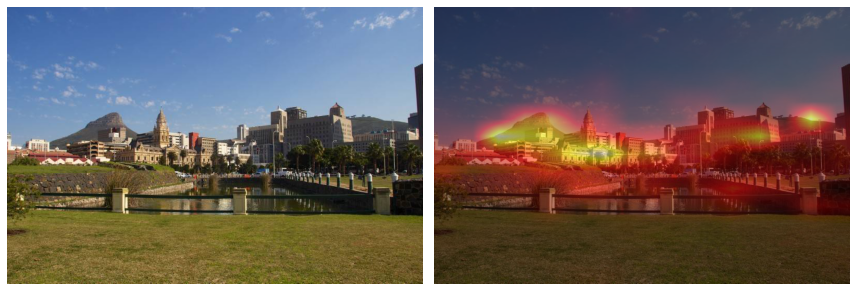

In [9]:
ind = 71
display(imgs[ind], attns[ind])